<a href="https://colab.research.google.com/github/aadarshsenapati/machine-learning/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 23.3MB/s]


In [ ]:
df = pd.read_csv("/content/multiclass.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df.isnull().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [ ]:
df_new = pd.get_dummies(df, columns=["Region"], drop_first=True)
df_new.head()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class,Region_2,Region_3
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,2,False,True
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,2,False,True
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.408781,2,False,True
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1,False,True
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.408781,1,False,True


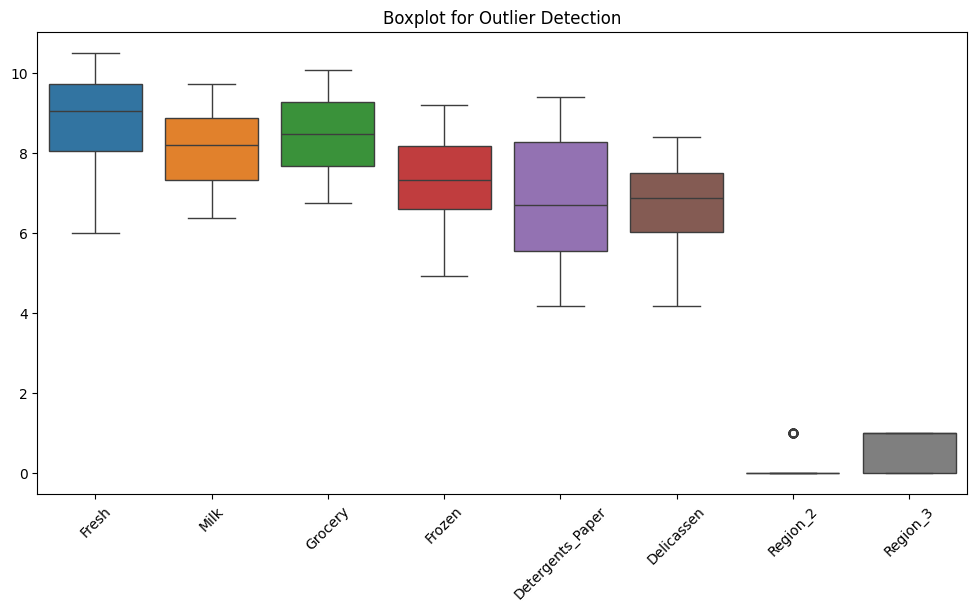

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("class", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [44]:
features = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
df_new[features] = df_new[features].apply(np.log1p)
for col in features:
    lower = df_new[col].quantile(0.05)
    upper = df_new[col].quantile(0.95)
    df_new[col] = np.clip(df_new[col], lower, upper)
Q1 = df_new[features].quantile(0.25)
Q3 = df_new[features].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df_new[features] < (Q1 - 1.5 * IQR)) |
                (df_new[features] > (Q3 + 1.5 * IQR)))

df_new_clean = df_new[~outlier_mask.any(axis=1)]

print("Before cleaning:", df_new.shape)
print("After cleaning :", df_new_clean.shape)


Before cleaning: (440, 9)
After cleaning : (416, 9)


In [45]:
Q1 = df_new[features].quantile(0.25)
Q3 = df_new[features].quantile(0.75)
IQR = Q3 - Q1

Q1 = Q1.reindex(features)
Q3 = Q3.reindex(features)
IQR = IQR.reindex(features)

outlier_mask = ((df_new[features] < (Q1 - 1.5 * IQR)) |
                (df_new[features] > (Q3 + 1.5 * IQR)))

df_clean = df_new[~outlier_mask.any(axis=1)]
print("Before removing outliers:", df.shape)
print("After removing outliers :", df_clean.shape)



Before removing outliers: (440, 8)
After removing outliers : (416, 9)


In [48]:
Q1 = df_clean.drop("class", axis=1).quantile(0.25)
Q3 = df_clean.drop("class", axis=1).quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_clean.drop("class", axis=1) < (Q1 - 1.5 * IQR)) |
            (df_clean.drop("class", axis=1) > (Q3 + 1.5 * IQR)))

print("Outlier counts per feature:")
print(outliers.sum())

Outlier counts per feature:
Fresh               19
Milk                 0
Grocery              0
Frozen               0
Detergents_Paper     0
Delicassen           3
Region_2            45
Region_3             0
dtype: int64


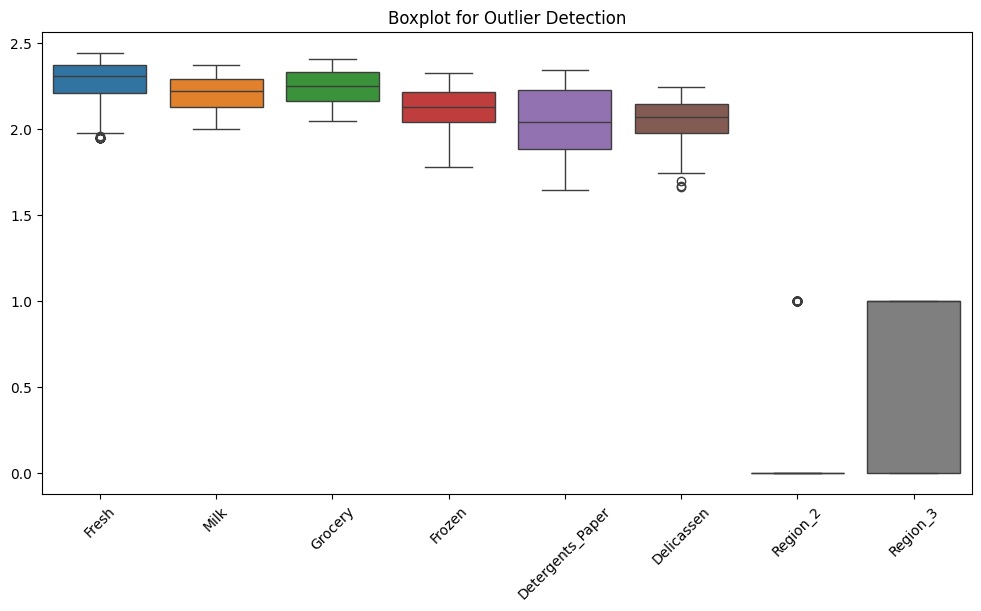

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean.drop("class", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

/tmp/ipython-input-2809950209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean["class"], palette="viridis")


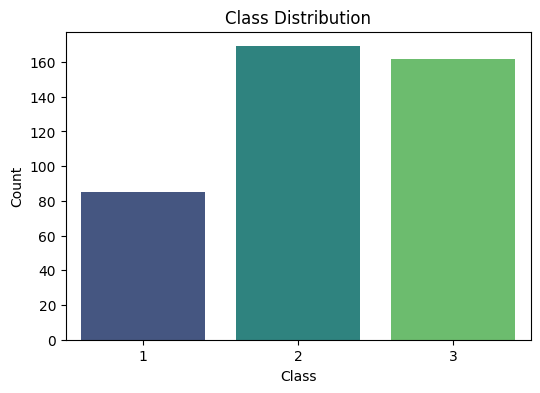

class
2    180
3    173
1     87
Name: count, dtype: int64


In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_clean["class"], palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
print(df["class"].value_counts())

In [53]:
X = df_clean.drop("class", axis=1).values
y = df_clean["class"].values
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

Before SMOTE: 2    144
3    138
1     70
Name: count, dtype: int64
After SMOTE : 2    144
3    144
1    144
Name: count, dtype: int64


In [54]:
X = df_clean.drop("class", axis=1).values
y = df_clean["class"].values

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict_one(self, x):
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = self.y_train[k_indices]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNNClassifier(k=7)
knn.fit(X_train_pca, y_train)
print("PCA-KNN Test Accuracy:", knn.score(X_test_pca, y_test))


PCA-KNN Test Accuracy: 0.3977272727272727


In [57]:
knn_scratch = KNNClassifier(k=5)
knn_scratch.fit(X_train, y_train)
train_acc = knn_scratch.score(X_train, y_train)
test_acc = knn_scratch.score(X_test, y_test)
print(f"KNN (Scratch) - Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

KNN (Scratch) - Train Accuracy: 0.929, Test Accuracy: 0.398


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train, y_train)

print("Sklearn KNN - Train Accuracy:", knn_sklearn.score(X_train, y_train))
print("Sklearn KNN - Test Accuracy :", knn_sklearn.score(X_test, y_test))


Sklearn KNN - Train Accuracy: 0.9204545454545454
Sklearn KNN - Test Accuracy : 0.3977272727272727
